In [391]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [392]:
df = pd.read_csv('Churn_Modelling.csv')

In [393]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
951,952,15785899,Ch'en,789,Germany,Male,33,8,151607.56,1,1,0,4389.40,0
8703,8704,15595350,Fermin,661,France,Female,31,3,136067.82,2,1,0,65567.91,0
5724,5725,15784286,Wood,641,Spain,Male,40,5,102145.13,1,1,1,100637.07,0
711,712,15650288,Summers,634,Germany,Male,35,6,116269.01,1,1,0,129964.94,0
3727,3728,15768367,Nebechukwu,781,France,Female,27,7,186558.55,1,1,1,175071.29,1


In [394]:
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace=True)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [396]:
df.shape

(10000, 11)

In [397]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [398]:
for col in df.columns:
    print(f'{col}: {len(df[col].unique())}')

CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


In [399]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5902,694,France,Male,40,9,0.00,2,1,0,40463.03,0
3408,832,Germany,Female,40,9,107648.94,2,1,1,134638.97,0
679,684,Spain,Female,38,3,0.00,2,1,0,44255.65,0
6506,585,Spain,Female,56,1,128472.80,1,1,0,186476.91,1
6822,669,Germany,Male,47,0,63723.78,2,1,1,181928.25,0


In [400]:
df['Geography'] = df['Geography'].map({'France':1,'Germany':0,'Spain':2})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [401]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in ['EstimatedSalary' , 'Balance' , 'CreditScore' , 'Tenure' , 'Age' , 'NumOfProducts' , 'Geography']:
    df[col] = scaler.fit_transform(df[[col]])

In [402]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.5,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1.0,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0.5,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0.5,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1.0,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.5,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0.5,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,0.5,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0.0,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [403]:
X , y = df.drop(columns='Exited') , df['Exited']

In [404]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

<Axes: xlabel='Exited', ylabel='count'>

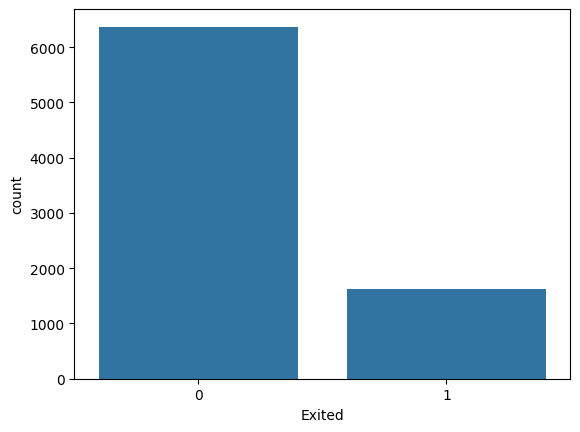

In [405]:
sns.countplot(x=y_train)

In [406]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

c:\Users\bisho\.conda\envs\tf\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Axes: xlabel='Exited', ylabel='count'>

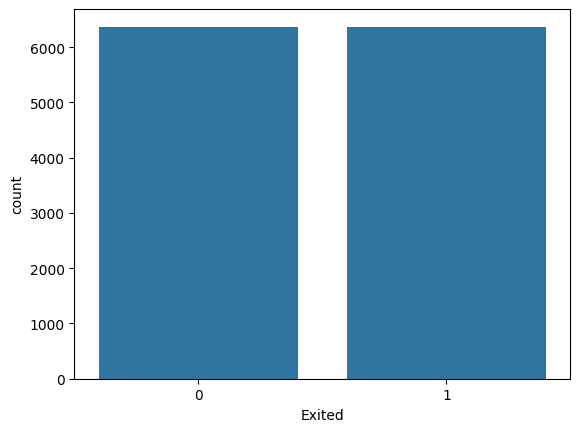

In [407]:
sns.countplot(x=y_train_res)

In [408]:
X_train_res.shape , X_test.shape

((12740, 10), (2000, 10))

In [409]:
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(10,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 300)               3300      
                                                                 
 dropout_19 (Dropout)        (None, 300)               0         
                                                                 
 dense_61 (Dense)            (None, 200)               60200     
                                                                 
 dense_62 (Dense)            (None, 100)               20100     
                                                                 
 dense_63 (Dense)            (None, 50)                5050      
                                                                 
 dense_64 (Dense)            (None, 1)                 51        
                                                                 
Total params: 88,701
Trainable params: 88,701
Non-tra

In [410]:
model.fit(X_train, y_train, epochs=50, class_weight={0:1, 1:2})

Epoch 1/50
250/250 [==============================] - 2s 6ms/step - loss: 0.6905 - accuracy: 0.7861
Epoch 2/50
250/250 [==============================] - 1s 6ms/step - loss: 0.6215 - accuracy: 0.8030
Epoch 3/50
250/250 [==============================] - 2s 6ms/step - loss: 0.5708 - accuracy: 0.8260
Epoch 4/50
250/250 [==============================] - 2s 6ms/step - loss: 0.5516 - accuracy: 0.8317
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.5465 - accuracy: 0.8351
Epoch 6/50
250/250 [==============================] - 1s 6ms/step - loss: 0.5286 - accuracy: 0.8395
Epoch 7/50
250/250 [==============================] - 1s 6ms/step - loss: 0.5328 - accuracy: 0.8382
Epoch 8/50
250/250 [==============================] - 2s 6ms/step - loss: 0.5233 - accuracy: 0.8426
Epoch 9/50
250/250 [==============================] - 2s 6ms/step - loss: 0.5228 - accuracy: 0.8409
Epoch 10/50
250/250 [==============================] - 2s 6ms/step - loss: 0.5160 - accuracy: 0.8431

In [411]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 2s 29ms/step - loss: 0.3843 - accuracy: 0.8460


[0.3842605650424957, 0.8460000157356262]

In [412]:
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[0.0243833 ],
       [0.01986607],
       [0.01049457],
       ...,
       [0.88294035],
       [0.00892068],
       [0.23355989]], dtype=float32)

In [413]:
y_pred = [ i > 0.5 for i in y_pred]

In [414]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



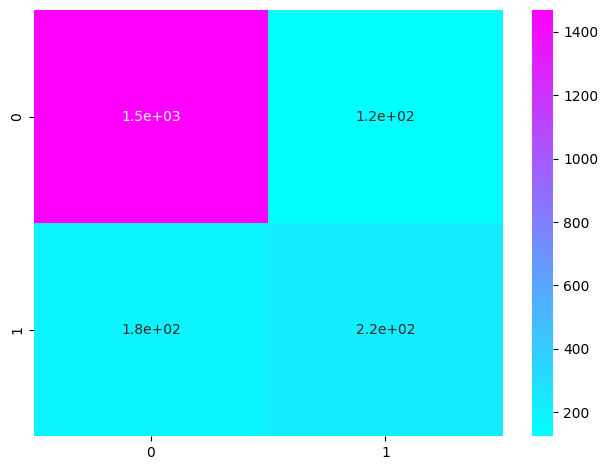

In [415]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='cool')
plt.tight_layout()
plt.show()